### **Part - I** 
* Initial setup
* Function to crop random section of T1 & T2 images

In [0]:
# Initial Setup

import os
import nibabel as nib
import matplotlib.pyplot as plt
%matplotlib inline
from random import seed
from random import randint
from skimage import transform
os.chdir("/content/drive/My Drive/Colab Notebooks/Datasets/hh/t1")

In [0]:
# Function to crop images --->

def crop_tuple_of_images(input_tuple, random_seed):
  seed(random_seed)
  image_number = randint(0, 240)
  start_pixel_y = randint(0, 180)
  sum_up_y = randint(11, 31)
  end_pixel_y = start_pixel_y + sum_up_y
  start_pixel_x = randint(0, 240)
  sum_up_x = randint(11, 31)
  end_pixel_x = start_pixel_x + sum_up_x

  image_count = 0
  processed_list = list()

  for image in input_tuple:
    processed_image = image[image_number, start_pixel_y:end_pixel_y, start_pixel_x:end_pixel_x]
    processed_list.append(processed_image) 
    image_count = image_count + 1

  pixel_specs = [image_number, start_pixel_y, end_pixel_y, sum_up_y, start_pixel_x, end_pixel_x, sum_up_x]
  output_tuple = tuple(processed_list)

  message_string = "Processed -> " + str(image_count) + " images...."
  print(message_string)

  return (output_tuple, pixel_specs)

In [0]:
# Test 1
os.chdir("/content/drive/My Drive/Colab Notebooks/Datasets/hh/t1")
images_set_1 = nib.load("IXI012-HH-1211-T1_fcm.nii.gz")
images_set_1 = images_set_1.get_fdata()
os.chdir("/content/drive/My Drive/Colab Notebooks/Datasets/hh/t2")
images_set_2 = nib.load("IXI012-HH-1211-T2_reg_fcm.nii.gz")
images_set_2 = images_set_2.get_fdata()

input_tuple = (images_set_1, images_set_2)

In [46]:
returned_tuple, random_numbers = crop_tuple_of_images(input_tuple, random_seed = 11)

Processed -> 2 images....


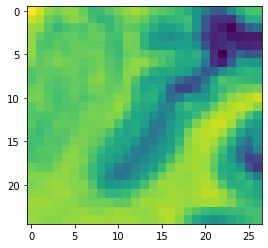

In [47]:
plt.imshow(returned_tuple[0])

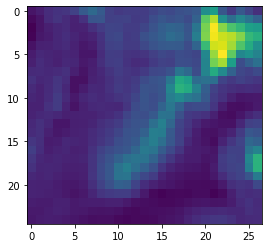

In [48]:
plt.imshow(returned_tuple[1])

In [49]:
random_numbers

[115, 143, 168, 25, 115, 142, 27]

### **Part - II**
* Create class to handle Nibabel datasets
* Class contains function that crops required section of images

In [0]:
# Class for dataset --->

class scan_dataset:
  def __init__(self, t1_data_path, t2_data_path, t1_image_set, t2_image_set,image_number, y_start, y_end, x_start, x_end):
    os.chdir(t1_data_path)
    t1_image_set_raw = nib.load(t1_image_set)
    self.t1_image_set = t1_image_set_raw.get_fdata()
    os.chdir(t2_data_path)
    t2_image_set_raw = nib.load(t2_image_set)
    self.t2_image_set = t2_image_set_raw.get_fdata()
    self.image_number = image_number
    self.y_start = y_start
    self.y_end = y_end
    self.x_start = x_start
    self.x_end = x_end

  def __len__(self):
    length_t1 = len(self.t1_image_set)  
    length_t2 = len(self.t2_image_set)
    if length_t1 == length_t2:
      print("T1 & T2 lengths are equal - returned T1 length...")
    else:
      print("T1 & T2 lengths are not equal - returned T1 length...")  
    return length_t1

  def __getitem__(self, index):
    image_1 = self.t1_image_set[index,:,:]
    image_2 = self.t2_image_set[index,:,:]
    img_dict = {"t1":image_1, "t2":image_2}
    return img_dict

  def __repr__(self):
    return("Nibabel T1 & T2 image-set object")

  def __str__(self):
    return("Nibabel T1 & T2 image-set object")    

  def image_crop(self):
    start_pixel_y = self.y_start
    end_pixel_y = self.y_end
    start_pixel_x = self.x_start
    end_pixel_x = self.x_end
    t1_cropped_image = self.t1_image_set[self.image_number, start_pixel_y:end_pixel_y, start_pixel_x:end_pixel_x]
    t2_cropped_image = self.t2_image_set[self.image_number, start_pixel_y:end_pixel_y, start_pixel_x:end_pixel_x]
    cropped_dict = {"t1":t1_cropped_image, "t2":t2_cropped_image}
    return cropped_dict

In [0]:
#Test 2

t1_data_path = "/content/drive/My Drive/Colab Notebooks/Datasets/hh/t1"
t2_data_path = "/content/drive/My Drive/Colab Notebooks/Datasets/hh/t2"
t1_image_set = "IXI012-HH-1211-T1_fcm.nii.gz"
t2_image_set = "IXI012-HH-1211-T2_reg_fcm.nii.gz"

nib_image_set_1 = scan_dataset(t1_data_path= t1_data_path,
                               t2_data_path= t2_data_path, 
                               t1_image_set = t1_image_set,
                               t2_image_set = t2_image_set,
                               image_number = 101, 
                               y_start = 101, 
                               y_end = 201, 
                               x_start = 41, 
                               x_end = 101)

In [52]:
repr(nib_image_set_1)

'Nibabel T1 & T2 image-set object'

In [53]:
print(nib_image_set_1)

Nibabel T1 & T2 image-set object


In [54]:
returned_len = len(nib_image_set_1)
print(returned_len)

T1 & T2 lengths are equal - returned T1 length...
240


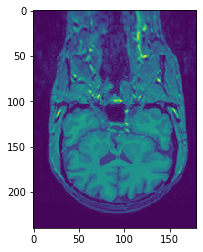

In [55]:
returned_images = nib_image_set_1[101]
plt.imshow(returned_images["t1"])

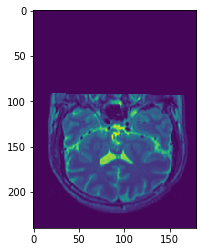

In [56]:
plt.imshow(returned_images["t2"])

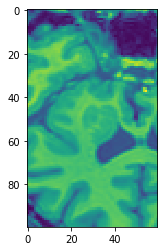

In [57]:
returned_images_cropped = nib_image_set_1.image_crop()
plt.imshow(returned_images_cropped["t1"])

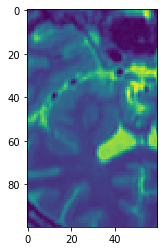

In [58]:
plt.imshow(returned_images_cropped["t2"])

In [0]:
#End